# PROPOSED TOPIC <br> 
#### An Improved Transfer Learning Based FaKe News Detection Model using Bi-LSTM And Machine leanring. 

##### An Enhance Fake News BI-LISTM and Machine Learning Detection Model using Transfer Learning Techniques.</p>

Benchamrk Paper 

Fake News Detection from Online media using Machine
learning Classifier 
<br>s===============================================================

Shalini Pandey1,4 Sankeerthi Prabhakaran1,5 , N V Subba Reddy2 and Dinesh Acharya3
1MTech CSIS, Department of Computer Science and Engineering, MIT, MAHE, Manipal
2Department of Computer Science and Engineering, MIT, MAHE, Manipal
3Department of Computer Science and Engineering, MIT, MAHE, Manipal
4shalini.pandey@learner.manipal.edu, 5sankeerthiprabhakaran.19@gmail.com
2nvs.reddy@manipal.edu, 3dinesh.acharya@manipal.edu
Abstract: With the advancement in technology, the consumption of news has shifted from Print
media to social media. The convenience and accessibility are major factors that have contributed to
this shift in consumption of the news. However, this change has bought upon a new challenge in the
form of “Fake news” being spread with not much supervision available on the net. In this paper, this
challenge has been addressed through a Machine learning concept. The algorithms such as K-Nearest
Neighbor, Support Vector Machine, Decision Tree, Naïve Bayes and Logistic regression Classifiers to
identify the fake news from real ones in a given dataset and also have increased the efficiency of these
algorithms by pre-processing the data to handle the imbalanced data more appropriately. Additionally,
comparison of the working of these classifiers is presented along with the results. The model proposed
has achieved an accuracy of 89.98% for KNN, 90.46% for Logistic Regression, 86.89% for Naïve
Bayes, 73.33% for Decision Tree and 89.33% for SVM in our experiment.


## Bi-LSTM -Transer learning -2- ML (Experiment )

## import libarary

In [1]:
import pandas as pd
import string
from tqdm import tqdm_notebook,tqdm
from warnings import filterwarnings
filterwarnings('ignore')
from tqdm import tqdm_pandas
tqdm.pandas()
import matplotlib.pyplot as plt

## load dataset

In [2]:
df = pd.read_csv('fake_and_real_news_dataset.csv')
df

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL
...,...,...,...,...
4589,ukZm6JTO#x,Russia Calls the War Party's Bluff,License DMCA \r\nCold War 2.0 has reached unpr...,FAKE
4590,yu0xKEiapJ,Bernie Sanders: The Democratic primary gave me...,Print \r\nSen. Bernie Sanders laid out the way...,FAKE
4591,c4Y370E_9c,"Pipeline Police Strip Search Native Girl, Then...",As the pressure to start construction on the D...,FAKE
4592,bBbeuCUeMH,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,FAKE


## Eplore dataset

In [3]:
sample_txt = df['text'][0]
sample_txt[:1000]

'UPDATE: Gov. Fallin vetoed the bill on Friday. Head here for more.\r\n\r\nLawmakers in Oklahoma approved a bill Thursday that would make performing abortions a felony and revoke\xa0the medical licenses of most\xa0physicians who assist in such procedures.\r\n\r\nThis sweeping measure, which opponents described as unconstitutional and unprecedented, now heads to\xa0Gov. Mary Fallin (R). She\xa0will have five days — not including Sunday — to decide whether to sign the bill, veto it or allow it to become law without her signature,\xa0according to a spokesman.\r\n\r\n“The governor will withhold comment on that bill, as she does on most bills, until she and her staff have had a chance to review it,” Michael McNutt, a spokesman for Fallin, said in an email.\r\n\r\nThe Oklahoma bill is the first such measure of its kind, according to the Center for Reproductive Rights, which says that other states seeking to ban abortion have simply banned the procedure rather than attaching penalties like th

In [18]:
df.isnull().sum()

idd      0
title    1
text     0
label    0
dtype: int64

In [19]:
# check for dublicate news .. 
df.duplicated().sum()

0

In [4]:
news = df[['text', 'label']]
news.head()

,text,label
0,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,Ever since Texas laws closed about half of the...,REAL
2,"Donald Trump and Hillary Clinton, now at the s...",REAL
3,A Houston grand jury investigating criminal al...,REAL
4,WASHINGTON -- Forty-three years after the Supr...,REAL


In [5]:
news.sample(10)['text']

194     Nearly two thirds of voters don’t know anythin...
3859    Email \r\n\r\nREPUBLICAN PRESIDENTIAL CANDIDAT...
2632    BREAKING: White House Abandons TPP & TTIP Nov ...
4544    Leave a Reply Click here to get more info on f...
1995    The GOP nominee said that he recognized that h...
3112    Can normal transistors act like a qubit? page:...
1372    Probably not. So he needs to decide how he wan...
3196    Inside the Invisible Government; War, Propagan...
1860    There were a couple of not-so-very-subtle sign...
3465    Comments \r\nA federal judge in Ohio has slapp...
Name: text, dtype: object

## Data Pre-processing

In [22]:
# this stage we would be removing 
# -punctuation mark 
# -stop words 
# -tokenize & convert to lower case

In [23]:
# removing punctuation mark


In [6]:
sample = news['text'][0][:700]
# romoving
punct = string.punctuation
special_char = ['\n', '\r', '\xa0', '—', '“']

text = ''.join([sm for sm in sample if sm not in punct])
sample = ''.join([sm for sm in text if sm not in special_char])
sample

'UPDATE Gov Fallin vetoed the bill on Friday Head here for moreLawmakers in Oklahoma approved a bill Thursday that would make performing abortions a felony and revokethe medical licenses of mostphysicians who assist in such proceduresThis sweeping measure which opponents described as unconstitutional and unprecedented now heads toGov Mary Fallin R Shewill have five days  not including Sunday  to decide whether to sign the bill veto it or allow it to become law without her signatureaccording to a spokesmanThe governor will withhold comment on that bill as she does on most bills until she and her staff have had a chance to review it” Michael McNutt a spokes'

In [7]:
# remove punctiation marks and special character... 
def remove_punctuation(texts):
    punct = string.punctuation
    special_char = ['\n', '\r', '\xa0', '—', '“', '’', '”', '»']
    remove_punc = ''.join([txt for txt in texts if txt not in punct])
    text = ''.join([rp for rp in remove_punc if rp not in special_char])
    return text
#  
# news['clean'] = news.text.progress_apply(lambda x:remove_punctuation(x))
# [remove_punctuation(n) for n in news.text[0:1]]   
# news['clean']

In [8]:
# removing stopwords 
from nltk.corpus import stopwords

# function to remove stopwords
def remove_stopword(text):
    # init stopword
    text = text.split()
    stop_words = stopwords.words('english')
    st_word = [txt for txt in text if not txt in stop_words] 
    return ' '.join(st_word)

# [remove_stopword(n) for n in news.clean[0:1]]  
# news['clean'] = news['clean'].progress_apply(lambda x:remove_stopword(x))
# news['clean'].head()

In [9]:
from nltk.stem import PorterStemmer

# stemming and lower case converstion
def stem_and_lower_text(text, lower=False):
    ps = PorterStemmer()
    text = text.split()
    
    if lower:
        stem_lower_text = [ps.stem(txt.lower()) for txt in text]
    else: 
        stem_lower_text = [ps.stem(txt) for txt in text]

    return ' '.join(stem_lower_text)

# [stem_and_lower_text(n) for n in news.clean[0:1]]  
# news['clean'] = news['clean'].progress_apply(lambda x: stem_and_lower_text(x, True))
# news['clean']

In [10]:
# data cleaning function to remove punction, stopword and stem the text... 
def data_cleaning(df, col):
    df[col] = df[col].progress_apply(lambda x:remove_punctuation(x))
    print('removal of punctuation complete..')
    df[col] = df[col].progress_apply(lambda x:remove_stopword(x))
    print('removal of stowords complete....')
    df[col] = df[col].progress_apply(lambda x:stem_and_lower_text(x))
    print('stemming complete....')
# data_cleaning(news, 'text')

In [11]:
# data cleaning function to remove punction, stopword and stem the text... 
def data_cleaning(data):
#     df[col] = df[col].progress_apply(lambda x:remove_punctuation(x))
#     df[col] = df[col].progress_apply(lambda x:remove_stopword(x))
#     df[col] = df[col].progress_apply(lambda x:stem_and_lower_text(x))
    data = remove_punctuation(data)
    data = remove_stopword(data)
    data = stem_and_lower_text(data)
    
    return data.split()
    
news['text'] = news['text'].progress_apply(lambda x: data_cleaning(x))
news['text']

  0%|          | 0/4594 [00:00<?, ?it/s]

100%|██████████| 4594/4594 [01:54<00:00, 40.14it/s]


0       [updat, gov, fallin, veto, bill, friday, head,...
1       [ever, sinc, texa, law, close, half, state, ab...
2       [donald, trump, hillari, clinton, start, line,...
3       [a, houston, grand, juri, investig, crimin, al...
4       [washington, fortythre, year, suprem, court, e...
                              ...                        
4589    [licens, dmca, cold, war, 20, reach, unpreced,...
4590    [print, sen, berni, sander, laid, way, would, ...
4591    [as, pressur, start, construct, dakota, access...
4592    [tweet, home, gold, gold, new, currenc, crisi,...
4593    [written, eric, margoli, as, former, soldier, ...
Name: text, Length: 4594, dtype: object

In [12]:
news

,text,label
0,"[updat, gov, fallin, veto, bill, friday, head,...",REAL
1,"[ever, sinc, texa, law, close, half, state, ab...",REAL
2,"[donald, trump, hillari, clinton, start, line,...",REAL
3,"[a, houston, grand, juri, investig, crimin, al...",REAL
4,"[washington, fortythre, year, suprem, court, e...",REAL
...,...,...
4589,"[licens, dmca, cold, war, 20, reach, unpreced,...",FAKE
4590,"[print, sen, berni, sander, laid, way, would, ...",FAKE
4591,"[as, pressur, start, construct, dakota, access...",FAKE
4592,"[tweet, home, gold, gold, new, currenc, crisi,...",FAKE


# Data Exploratory Analysis.... (EDA)

In [13]:
rows, col = news.shape
print(f'Row Count    : {rows}\nColumns Count : {col}   ')

Row Count    : 4594
Columns Count : 2   


REAL    2297
FAKE    2297
Name: label, dtype: int64


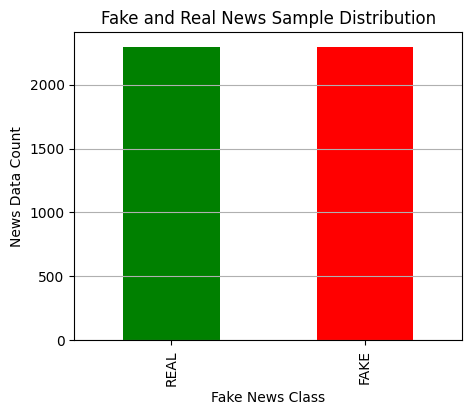

In [14]:
# class distribution
print(news.label.value_counts())
print('==============================')
plt.figure(figsize=(5,4))
news.label.value_counts().plot(kind='bar', color=['green', 'red'], sharey=True)
plt.title('Fake and Real News Sample Distribution')
plt.ylabel('News Data Count')
plt.xlabel('Fake News Class')
plt.grid(axis='y')
plt.show()

In [33]:
# word count
def sample_word_count(sample):
    sample_count = len(sample)
    return sample_count

news['word_count'] = news['text'].progress_apply(lambda x:sample_word_count(x))
news

100%|██████████████████████████| 4594/4594 [00:00<00:00, 286573.55it/s]


,text,label,word_count
0,"[updat, gov, fallin, veto, bill, friday, head,...",REAL,621
1,"[ever, sinc, texa, law, close, half, state, ab...",REAL,390
2,"[donald, trump, hillari, clinton, start, line,...",REAL,305
3,"[a, houston, grand, juri, investig, crimin, al...",REAL,498
4,"[washington, fortythre, year, suprem, court, e...",REAL,246
...,...,...,...
4589,"[licens, dmca, cold, war, 20, reach, unpreced,...",FAKE,455
4590,"[print, sen, berni, sander, laid, way, would, ...",FAKE,109
4591,"[as, pressur, start, construct, dakota, access...",FAKE,17
4592,"[tweet, home, gold, gold, new, currenc, crisi,...",FAKE,932


In [34]:
news.word_count.count()

4594

In [35]:
news_class = news.groupby('label')
fake_count = news_class.get_group('FAKE').word_count
real_count = news_class.get_group('REAL').word_count

In [37]:
news_class.describe()['word_count']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
FAKE,2297.0,400.393557,585.993905,0.0,125.0,259.0,496.0,11819.0
REAL,2297.0,549.356987,487.228248,6.0,285.0,469.0,680.0,7821.0


<Figure size 500x400 with 0 Axes>

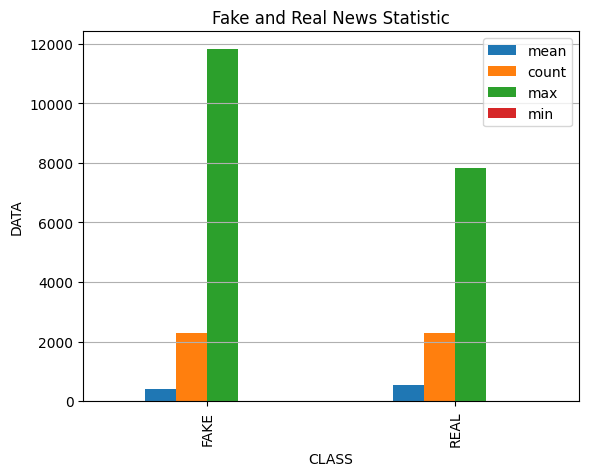

In [38]:
plt.figure(figsize=(5,4))
news_class.describe().word_count[['mean', 'count', 'max', 'min']].plot(kind='bar')
plt.title('Fake and Real News Statistic')
plt.ylabel('DATA')
plt.xlabel('CLASS')
plt.grid(axis='y')
plt.show()

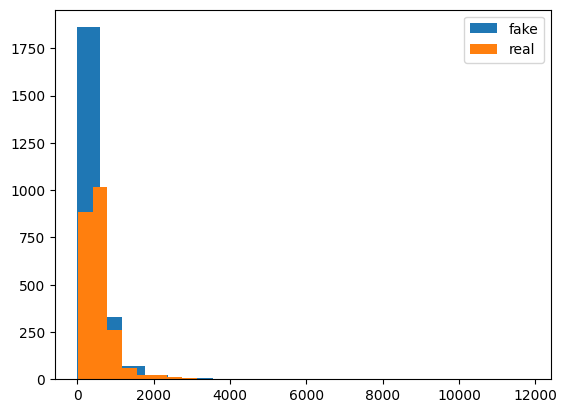

In [39]:
# Create subplots
plt.hist(fake_count, bins=20, label='fake')
plt.hist(real_count, bins=20, label='real')
plt.legend()
plt.show()

In [40]:
news_class.get_group('FAKE')['text']

2297    [2016, us, presidenti, elect, 45, 0, 14, 0, 0,...
2298    [jewel, jewels817, octob, 28, 2016, neera, tan...
2299    [39, shoina, villag, drown, waist, sand, it, d...
2300    [«, today, 083635, pm, aig, quadrupl, limit, t...
2301    [by, gilad, atzmon, novemb, 2, 2016, jew, see,...
                              ...                        
4589    [licens, dmca, cold, war, 20, reach, unpreced,...
4590    [print, sen, berni, sander, laid, way, would, ...
4591    [as, pressur, start, construct, dakota, access...
4592    [tweet, home, gold, gold, new, currenc, crisi,...
4593    [written, eric, margoli, as, former, soldier, ...
Name: text, Length: 2297, dtype: object

In [41]:
# word frequency and word cloud
from nltk.probability import FreqDist
world_list = []

for sent in news.text: 
    world_list.extend(sent)

In [42]:
print(f'Total Word in Vocab == {len(world_list)}')

Total Word in Vocab == 2181577


In [43]:
freq_distribution = FreqDist(world_list)
freq_distribution

FreqDist({'trump': 23247, 'clinton': 16998, 'the': 15981, 'said': 14378, 'i': 13024, 'state': 11580, 'would': 9565, 'new': 9037, 'campaign': 8545, 'one': 8419, ...})

In [44]:
sorted_world  = sorted(freq_distribution, key=freq_distribution.__getitem__, reverse=True)
sorted_world[:10]

['trump',
 'clinton',
 'the',
 'said',
 'i',
 'state',
 'would',
 'new',
 'campaign',
 'one']

In [45]:
large_words = dict([(k,v) for k,v in freq_distribution.items() if len(k)>3])

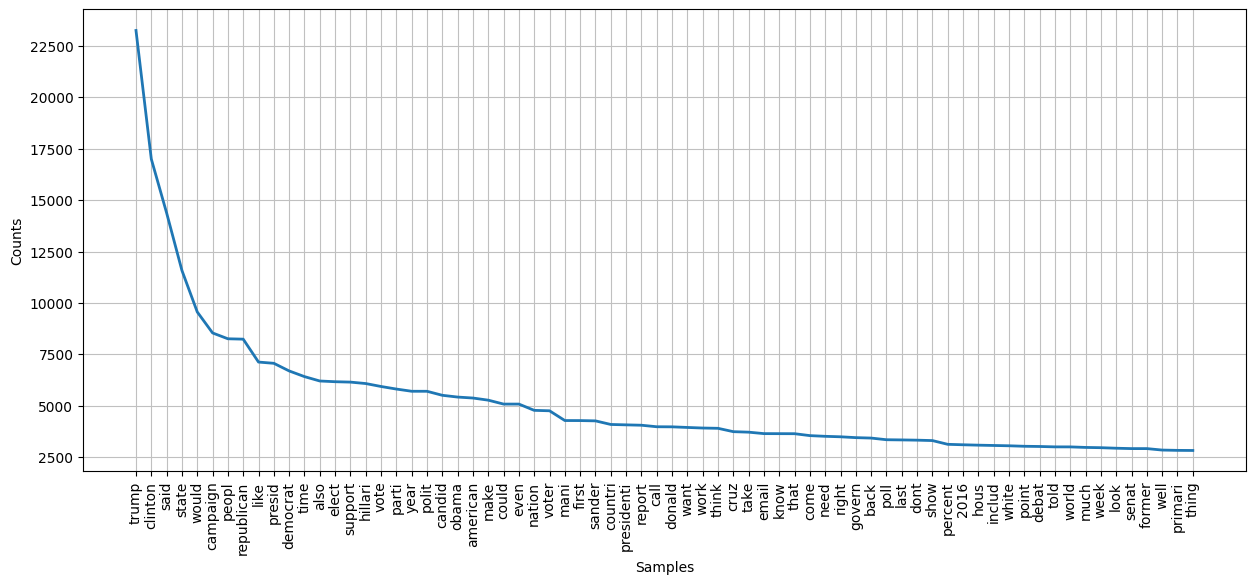

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
plt.figure(figsize=(15,6))
frequency_dist = FreqDist(large_words)
frequency_dist.plot(70,cumulative=False)

In [47]:
world_fake_list = []
world_real_list = []


for sent in news_class.get_group('FAKE')['text']: 
    world_fake_list.extend(sent)

for sent in news_class.get_group('REAL')['text']: 
    world_real_list.extend(sent)

print(f'Total FAKE Word in Vocab == {len(world_fake_list)}')
print(f'Total REAL Word in Vocab == {len(world_real_list)}')

Total FAKE Word in Vocab == 919704
Total REAL Word in Vocab == 1261873


In [48]:
# REAL NEWS

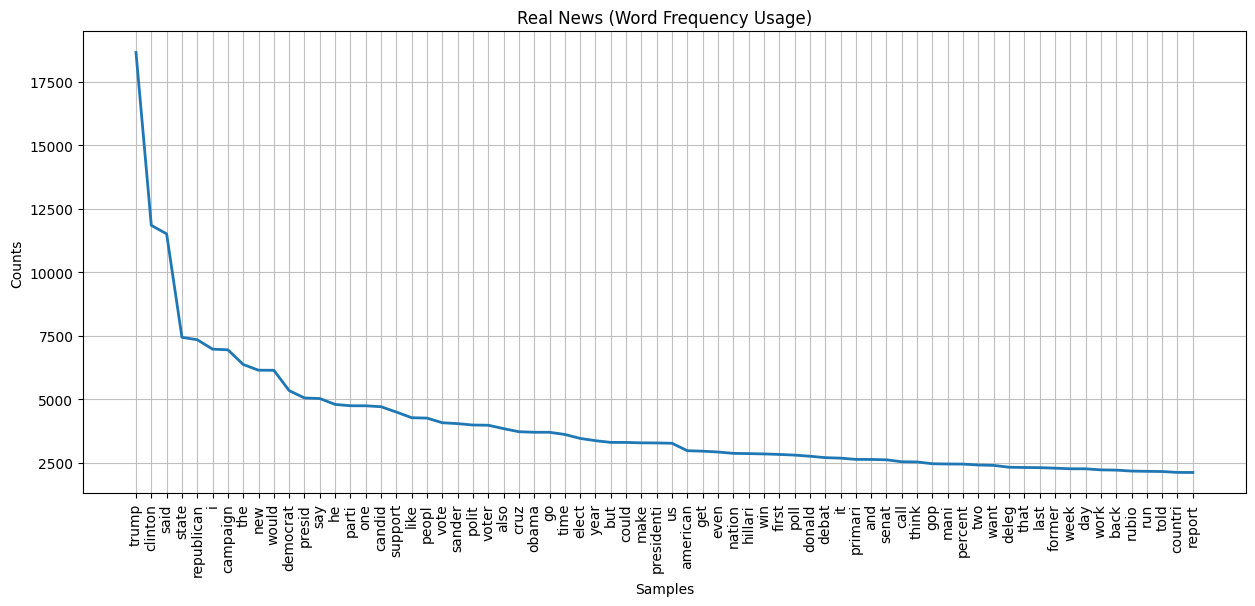

In [49]:
freq_real_distribution = FreqDist(world_real_list)
sorted_world  = sorted(freq_real_distribution, key=freq_distribution.__getitem__, reverse=True)
large_words = dict([(k,v) for k,v in freq_distribution.items() if len(k)>3])
plt.figure(figsize=(15,6))
frequency_dist = FreqDist(freq_real_distribution)
frequency_dist.plot(70,cumulative=False, title='Real News (Word Frequency Usage)')
plt.show()

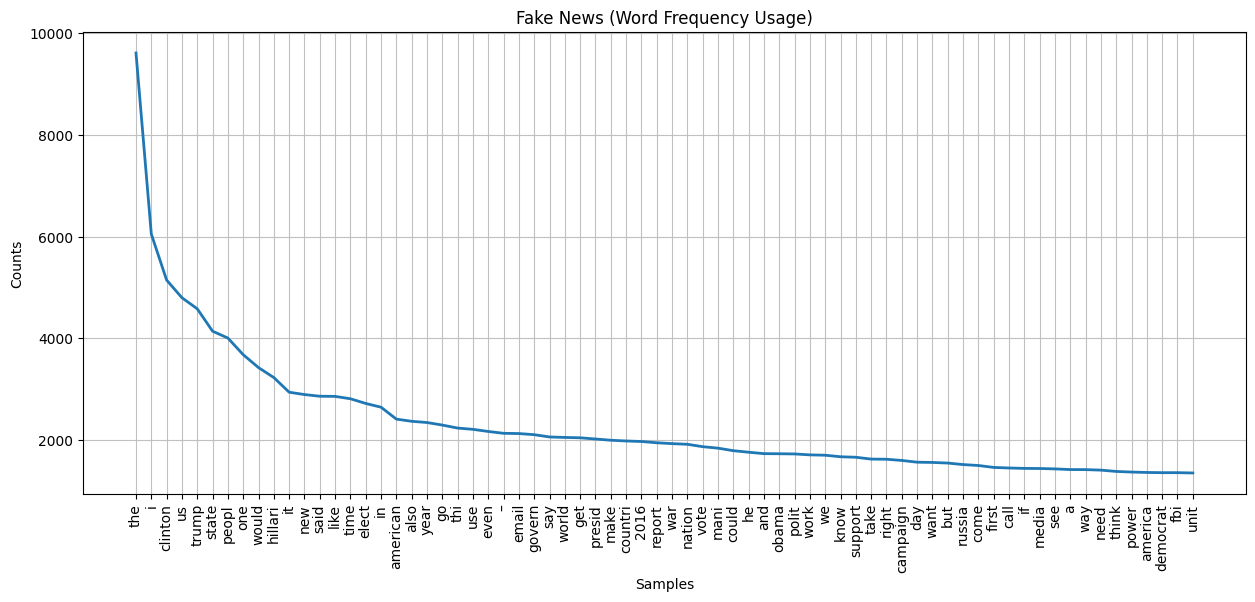

In [50]:
freq_fake_distribution = FreqDist(world_fake_list)
sorted_world  = sorted(freq_fake_distribution, key=freq_distribution.__getitem__, reverse=True)
large_words = dict([(k,v) for k,v in freq_distribution.items() if len(k)>3])
plt.figure(figsize=(15,6))
frequency_dist = FreqDist(freq_fake_distribution)
frequency_dist.plot(70,cumulative=False, title='Fake News (Word Frequency Usage)')
plt.show()

In [51]:
samp_text = news_class.get_group('FAKE')['text'].iloc[0]
samp = ' '.join(samp_text)
samp

'2016 us presidenti elect 45 0 14 0 0 republican presidenti nomine donald trump claim spent 100 million money candidaci elect day us media report washington sputnik accord candid latest file us feder elect commiss septemb 30 trump person contribut 561 million campaign dure period clinton given 13 million campaign © reuter carlo barria clinton claim us voter reject trump ‘divis vision america ill 100 million campaign im prepar go much trump told cnn ribboncut ceremoni wednesday new hotel washington dc hillari clinton noth campaign she special interest donor give money whatev tell trump declin give detail ask specifi much spend elect day novemb 8'

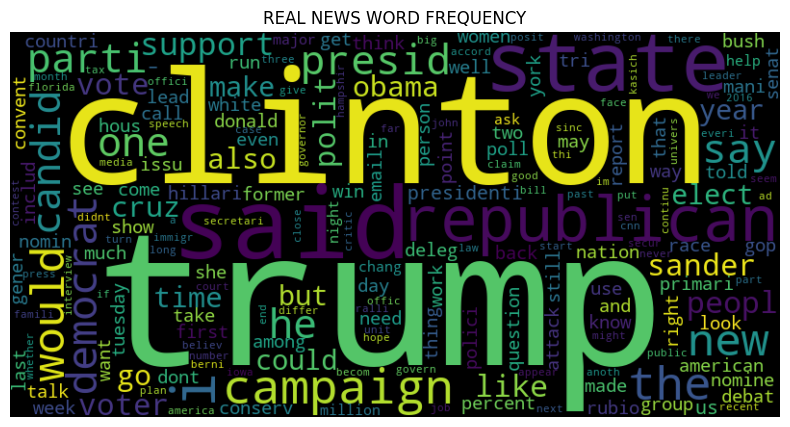

In [55]:
from wordcloud import WordCloud
# Generate word cloud from frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(freq_real_distribution)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('REAL NEWS WORD FREQUENCY')
plt.axis('off')
plt.show()

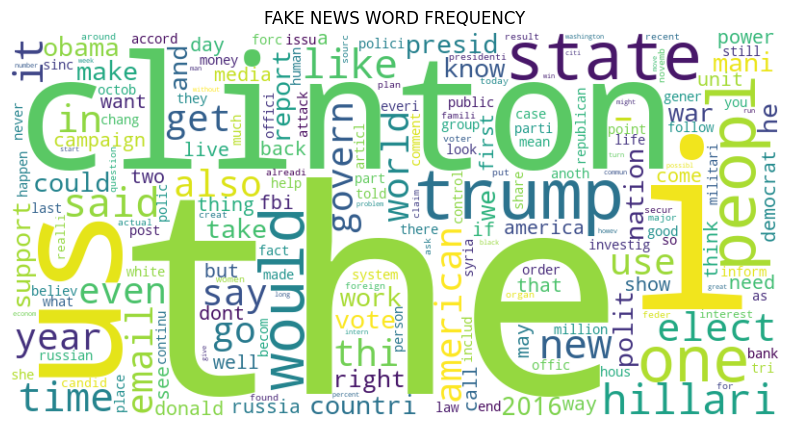

In [57]:
# Generate word cloud from frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_fake_distribution)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('FAKE NEWS WORD FREQUENCY')
plt.axis('off')
plt.show()

## LABEL ENCODING

In [58]:
# news.label{'FAKE':0, 'REAL':1 }
news.label = news.label.replace({'FAKE':0, 'REAL':1 })
news

,text,label,word_count
0,"[updat, gov, fallin, veto, bill, friday, head,...",1,621
1,"[ever, sinc, texa, law, close, half, state, ab...",1,390
2,"[donald, trump, hillari, clinton, start, line,...",1,305
3,"[a, houston, grand, juri, investig, crimin, al...",1,498
4,"[washington, fortythre, year, suprem, court, e...",1,246
...,...,...,...
4589,"[licens, dmca, cold, war, 20, reach, unpreced,...",0,455
4590,"[print, sen, berni, sander, laid, way, would, ...",0,109
4591,"[as, pressur, start, construct, dakota, access...",0,17
4592,"[tweet, home, gold, gold, new, currenc, crisi,...",0,932


# Word2Vec Model (SKip Gram Model)

In [60]:
import gensim 
from gensim.models import Word2Vec

In [ ]:
w2v_model = gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300', binary=True)

In [63]:
# training the word 2 vect using skip gram model.....
w2v = Word2Vec(news.text, vector_size=300, window=5, min_count=1)
w2v

In [80]:
prmt='''
===================================================
    FEATURE VECTOR REPRESENTATION FOR TRUMP
===================================================
'''
print(prmt)
w2v.wv['trump']


    FEATURE VECTOR REPRESENTATION FOR TRUMP



array([-1.11853434e-02,  4.25242722e-01, -3.02144825e-01,  1.70636237e+00,
       -1.24471903e+00, -4.83426213e-01,  1.44241190e+00,  1.38953292e+00,
       -1.73934674e+00, -5.66952765e-01,  7.96469331e-01,  4.27282527e-02,
       -9.21966851e-01,  6.62585914e-01, -3.09394509e-01,  1.37417763e-01,
       -4.33343977e-01, -5.54251426e-04, -1.23113990e-01, -1.62235665e+00,
        1.54700935e-01, -2.98954308e-01,  8.32439065e-01, -4.63889241e-01,
        5.01931787e-01, -5.35446763e-01, -1.06983237e-01,  6.56983376e-01,
        2.24797115e-01, -1.28063238e+00, -1.03497291e+00, -3.88470143e-01,
        8.91686678e-01, -2.10346669e-01,  2.46665731e-01,  1.37520266e+00,
        8.74668241e-01, -1.81924760e-01, -1.71910629e-01, -1.04018843e+00,
       -3.02359045e-01, -3.26360852e-01, -7.33408988e-01, -1.49295285e-01,
       -3.69922996e-01,  2.83090740e-01, -8.30890179e-01,  1.55024719e+00,
       -3.51329088e-01,  1.05764210e+00, -1.72387731e+00,  2.34583974e-01,
       -2.60667890e-01,  

In [65]:
dimension = w2v.wv.vector_size
print(f'Each Word Vector size : {dimension}')

Each Word Vector size : 300


In [87]:
import numpy as np 
# function to generate feature using Word 2 vec (w2v trained from scratch)
def generate_w2v_featureML(w2v , documents, w2v_dimension):
    
    feature_vectors = []
    
    for document in documents: 
        
#       loop through each row and get the embding vector ... check if word is in vocab
        features = [w2v.wv[doc] for doc in document if doc in w2v.wv]
        
#       if the matrix is not empty
        if features:
#           sum the matrix into a single embding size matrix divide each value with the 
#           number of word found in featrues
            feature_vector = sum(features) / len(features)
    
#       if list is empty
        else: 
            feature_vector = [0] * w2v_dimension
#           store vectore for each document row from pandas into the 
#           the list of features 
        
        feature_vectors.append(feature_vector)
    
    return np.array(feature_vectors)
            
        
f_vectors = generate_w2v_featureML(w2v ,news['text'], dimension )

In [88]:
f_vectors

array([[-0.04667402,  0.26403695, -0.2737475 , ..., -0.40820548,
         0.07063957,  0.0679497 ],
       [-0.01310219,  0.19625455, -0.24682829, ..., -0.31984189,
         0.00793184,  0.09669717],
       [-0.02582278,  0.30900446, -0.19854815, ..., -0.35612756,
         0.14959392,  0.01937572],
       ...,
       [ 0.10627823,  0.35575232, -0.35436875, ..., -0.37023023,
        -0.04914299,  0.25624454],
       [-0.1343126 ,  0.16097513, -0.11313909, ..., -0.10294472,
        -0.02822923,  0.21717986],
       [-0.03829409,  0.36395726, -0.15393502, ..., -0.29687837,
         0.00851649,  0.12522228]])

In [17]:
# fv/len(v)
# w2v.wv['is']
# # len(feature_vectors)
# len(f_vectors)

## Train & Testing sample

In [210]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(f_vectors, news.label, test_size=0.2, random_state=42)

## Machin Model Training

In [90]:
# machin leanring considered for training inlude
# 1. KNN 
# 2. logistic Regression
# 3. Naive Bayes
# 4. Decision Tree 
# 5. SVM

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [23]:
# w2v.wv.key_to_i

In [232]:
ml_results={
    'model':[], 
    'accuracy':[], 
    'precision':[], 
    'recall':[], 
    'f1score':[]
}

In [91]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train, y_train)
predict = lr.predict(X_test)
report = metrics.classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       450
           1       0.89      0.86      0.88       469

    accuracy                           0.88       919
   macro avg       0.88      0.88      0.88       919
weighted avg       0.88      0.88      0.88       919



In [ ]:
acc = metrics.accuracy_score(predict, y_test)
prec = metrics.precision_score(predict, y_test)
recall = metrics.recall_score(predict, y_test)
f1 = metrics.f1_score(predict, y_test)

ml_results['model'].append('Logistic Regression')
ml_results['accuracy'].append(acc)
ml_results['precision'].append(prec)
ml_results['recall'].append(recall)
ml_results['f1score'].append(f1)


print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))

In [92]:
# KNN 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_train, y_train)
predict = knn.predict(X_test)
report = metrics.classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       450
           1       0.84      0.88      0.86       469

    accuracy                           0.85       919
   macro avg       0.85      0.85      0.85       919
weighted avg       0.85      0.85      0.85       919



In [93]:
# naive Bayes 
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_train, y_train)
predict = nb.predict(X_test)
report = metrics.classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       450
           1       0.83      0.76      0.79       469

    accuracy                           0.80       919
   macro avg       0.80      0.80      0.80       919
weighted avg       0.80      0.80      0.80       919



In [94]:
# support vector machine 
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_train, y_train)
predict = svm.predict(X_test)
report = metrics.classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       450
           1       0.91      0.86      0.88       469

    accuracy                           0.88       919
   macro avg       0.88      0.88      0.88       919
weighted avg       0.88      0.88      0.88       919



In [95]:
# naive Bayes 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train, y_train)
predict = dt.predict(X_test)
report = metrics.classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       450
           1       0.80      0.81      0.81       469

    accuracy                           0.80       919
   macro avg       0.80      0.80      0.80       919
weighted avg       0.80      0.80      0.80       919



In [24]:
# futher xplore the dataset
# news.label.value_counts().plot(kind='bar')
# loading google word to vec 
# import gensim 

# google_vec = 'GoogleNews-vectors-negative300.bin'

# w2v = gensim.models.keyedvectors.load_word2vec_format(google_vec, binary=True)
# w2v['play']

In [31]:

dimension = 300 # google vectore download is 300 in dimension ....

# function to generate feature using Word 2 vec (for pretrined google vec)
def generate_w2v_featureML(w2v , documents, w2v_dimension):
    feature_vectors = []
    for document in documents:  
#       loop through each row and get the embding vector ... check if word is in vocab
        fatures = [w2v[doc] for doc in document if doc in w2v]
#       if the matrix is not empty
        if features:
#           sum the matrix into a single embding size matrix divide each value with the 
#           number of word found in featrues
            feature_vector = sum(features) / len(features)
#       if list is empty
        else: 
            feature_vector = [0] * w2v_dimension
#           store vectore for each document row from pandas into the 
#           the list of features 
        feature_vectors.append(feature_vector)
    
    return feature_vectors
        
# f_vectors = generate_w2v_featureML(w2v ,news['text'], dimension )

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(f_vectors, news.label, test_size=0.2)

In [11]:
# # logistic regression
# lr = LogisticRegression()
# lr.fit(X_train,y_train)

# predict = lr.predict(X_test)
# report = metrics.classification_report(y_test, predict)
# print(report)



# # naive Bayes 
# nb = GaussianNB()
# nb.fit(X_train,y_train)
# nb.score(X_train, y_train)
# predict = nb.predict(X_test)
# report = metrics.classification_report(y_test, predict)
# print(report)

# # KNN 
# knn = KNeighborsClassifier()
# knn.fit(X_train,y_train)
# knn.score(X_train, y_train)
# predict = knn.predict(X_test)
# report = metrics.classification_report(y_test, predict)
# print(report)


# # support vector machine 
# svm = SVC()
# svm.fit(X_train,y_train)
# svm.score(X_train, y_train)
# predict = svm.predict(X_test)
# report = metrics.classification_report(y_test, predict)
# print(report)



# # naive Bayes 
# dt = DecisionTreeClassifier()
# dt.fit(X_train,y_train)
# dt.score(X_train, y_train)
# predict = dt.predict(X_test)
# report = metrics.classification_report(y_test, predict)
# print(report)

Vobac for Deep learning Model

In [215]:
from sklearn import model_selection
# deep leanring transformation 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM

X_train, X_test, y_train, y_test = model_selection.train_test_split(news['text'], news['label'], random_state=0)

In [216]:
import numpy as np
# creating an embedding dimend
# Get the vocabulary size and embedding dimension from the loaded model
max_features = 10000
maxlen = 300

# tokinizing, converting to numbers and pad to same size
# train data
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(tokenized_train, maxlen=maxlen)

In [217]:
# test data
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [218]:
# building embedding matrix
vocab_size = len(tokenizer.word_index)
print(vocab_size)
dim = 300

# generating weighted matrix.. 
weight_matrix = np.zeros((vocab_size, dim))
weight_matrix.shape

80859


(80859, 300)

In [100]:
w2v.wv.index_to_key[:4]

['trump', 'clinton', 'the', 'said']

In [219]:
# vocab = model.wv.key_to_index
vocab = tokenizer.word_index
for word, index in tokenizer.word_index.items():
#     print(word, (index-1))c
    if index < vocab_size: 
        if word in w2v.wv.index_to_key:
            weight_matrix[index] = w2v.wv[word]
#             print(len(weight_matrix[index-1]))
        else: 
            weight_matrix[index] = np.zeros(300)

print('matrix generated complete')
print(weight_matrix.shape)

matrix generated complete
(80859, 300)


In [233]:
batch_size = 256
epochs = 10
embed_size = 300

model = tf.keras.Sequential()
#Non-trainable embeddidng layer
model.add(tf.keras.layers.Embedding(vocab_size, output_dim=embed_size, input_length=maxlen, weights=[weight_matrix] , trainable=False))
#LSTM 
model.add(tf.keras.layers.LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
# model.add(tf.keras.layers.Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(tf.keras.layers.LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(tf.keras.layers.Dense(units = 32 , activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [234]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 300)          24257700  
                                                                 
 lstm_13 (LSTM)              (None, 300, 128)          219648    
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 24,528,869
Trainable params: 271,169
Non-trainable params: 24,257,700
_________________________________________________________________


In [235]:
X_train

array([[ 235,  119,  416, ...,   14,   58,  279],
       [1547, 2178,   25, ...,  216,  571,   26],
       [ 308, 1625,   45, ...,   10,    5,   45],
       ...,
       [ 238,  407,  285, ...,  262,  611,   49],
       [   0,    0,    0, ..., 5117,  670,   11],
       [   0,    0,    0, ..., 2156,  190,  314]])

In [236]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
10/10 [==============================] - 184s 18s/step - loss: 0.7675 - accuracy: 0.5633 - val_loss: 0.6471 - val_accuracy: 0.5977
Epoch 2/10
10/10 [==============================] - 192s 19s/step - loss: 0.5826 - accuracy: 0.7188 - val_loss: 0.4649 - val_accuracy: 0.7950
Epoch 3/10
10/10 [==============================] - 200s 20s/step - loss: 0.4942 - accuracy: 0.7777 - val_loss: 0.4230 - val_accuracy: 0.8211
Epoch 4/10
10/10 [==============================] - 223s 23s/step - loss: 0.4456 - accuracy: 0.8063 - val_loss: 0.4617 - val_accuracy: 0.8085
Epoch 5/10
10/10 [==============================] - 252s 25s/step - loss: 0.3995 - accuracy: 0.8316 - val_loss: 0.3828 - val_accuracy: 0.8414
Epoch 6/10
10/10 [==============================] - 239s 24s/step - loss: 0.3372 - accuracy: 0.8615 - val_loss: 0.3469 - val_accuracy: 0.8656
Epoch 7/10
10/10 [==============================] - 258s 26s/step - loss: 0.3109 - accuracy: 0.8723 - val_loss: 0.3257 - val_accuracy: 0.8733
Epoch 

KeyboardInterrupt: 

In [41]:
# saving model
# model.save('fake_news_w2v_lstm_model.h5')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
from keras.models import load_model

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

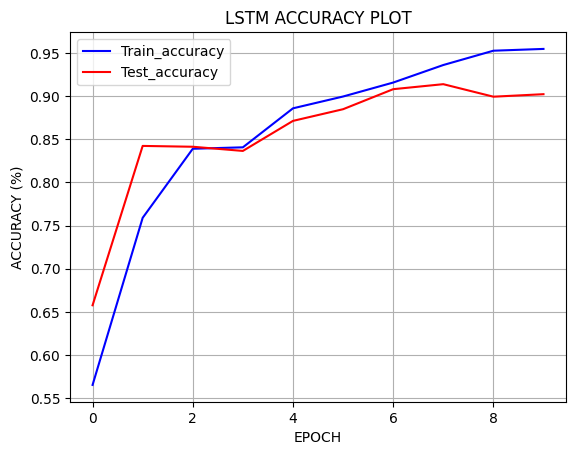

In [44]:
# ploting training accuracy and loss accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.title('LSTM ACCURACY PLOT')
plt.plot(train_acc, label='Train_accuracy', color='blue')
plt.plot(test_acc, label='Test_accuracy', color='red')
plt.legend()
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY (%)')
plt.show()

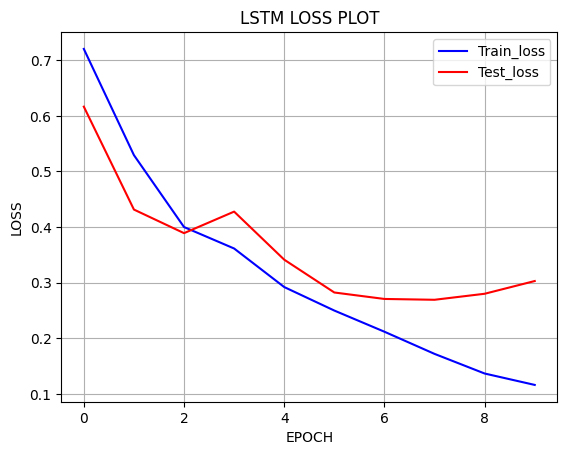

In [45]:
# ploting training accuracy and loss accuracy
train_acc = history.history['loss']
test_acc = history.history['val_loss']

plt.title('LSTM LOSS PLOT')
plt.plot(train_acc, label='Train_loss', color='blue')
plt.plot(test_acc, label='Test_loss', color='red')
plt.legend()
plt.grid(True)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.show()

In [46]:
# making prediction
prediction = model.predict(X_test)

36/36 [==============================] - 9s 240ms/step


In [47]:
# convert continuous prediction to integer (0 and 1)
def normalize_prediction(prediction):
    predictions = []
    for predict in prediction: 
        if predict > 0.5: 
            predictions.append(1)
        else: 
            predictions.append(0)      
    return np.array(predictions)
        
    
norm_prediction = normalize_prediction(prediction)
norm_prediction

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
acc = metrics.accuracy_score(norm_prediction, y_test)
prec = metrics.precision_score(norm_prediction, y_test)
recall = metrics.recall_score(norm_prediction, y_test)
f1 = metrics.f1_score(norm_prediction, y_test)

print('Overall Accuracy :  {}'.format(acc))
print('Overall Precision : {}'.format(prec))
print('Overall Recall :    {}'.format(recall))
print('Overall F1-score :  {}'.format(f1))

Overall Accuracy :  0.8990426457789382
Overall Precision : 0.856637168141593
Overall Recall :    0.9325626204238922
Overall F1-score :  0.892988929889299


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       630
           1       0.86      0.93      0.89       519

    accuracy                           0.90      1149
   macro avg       0.90      0.90      0.90      1149
weighted avg       0.90      0.90      0.90      1149



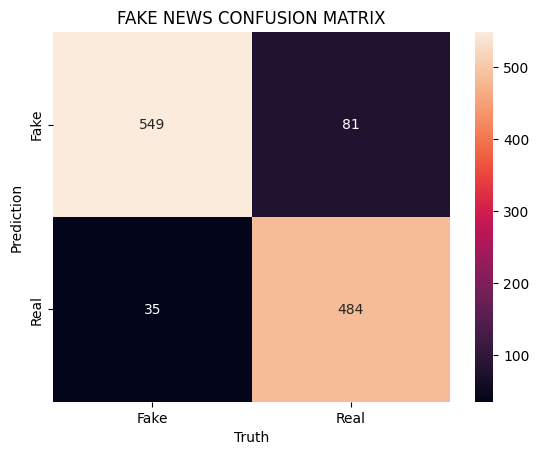

In [53]:
# visualizing performance 

# classification report
cr_report = metrics.classification_report(norm_prediction, y_test)

# confusion matrix
cf_report = metrics.confusion_matrix(norm_prediction, y_test)

print(cr_report)


# print(cr_report.ravel())
labels = ['Fake', 'Real']
plt.title('FAKE NEWS CONFUSION MATRIX')
sn.heatmap(cf_report, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [ ]:
# saving modelload_model('fake_news_w2v_lstm_model.h5')
lstm_model = load_model('fake_news_w2v_lstm_model.h5')
lstm_model.layers

In [56]:
lstm_output = lstm_model.predict(X_train)
lstm_output

108/108 [==============================] - 22s 193ms/step


array([[0.997881  ],
       [0.97648597],
       [0.0088865 ],
       ...,
       [0.9977943 ],
       [0.01121061],
       [0.07347751]], dtype=float32)

In [58]:
# logistic regression
lr = LogisticRegression()
lr.fit(lstm_output,y_train)
lr.score(lstm_output, y_train)

0.9480406386066763

In [59]:
lstm_x_test = lstm_model.predict(X_test)
lr_prediction = lr.predict(lstm_x_test)
report = metrics.classification_report(y_test, lr_prediction)
print(report)

36/36 [==============================] - 7s 198ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       584
           1       0.92      0.88      0.90       565

    accuracy                           0.90      1149
   macro avg       0.90      0.90      0.90      1149
weighted avg       0.90      0.90      0.90      1149



In [60]:
# KNN 
knn = KNeighborsClassifier()
knn.fit(lstm_output,y_train)
print(knn.score(lstm_output, y_train))

lstm_x_test = lstm_model.predict(X_test)
knn_prediction = knn.predict(lstm_x_test)
report = metrics.classification_report(y_test, knn_prediction)
print(report)

0.9579100145137881
36/36 [==============================] - 7s 181ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       584
           1       0.90      0.91      0.91       565

    accuracy                           0.91      1149
   macro avg       0.91      0.91      0.91      1149
weighted avg       0.91      0.91      0.91      1149



In [64]:
# naive Bayes 
nb = GaussianNB()
nb.fit(lstm_output,y_train)
nb.score(lstm_output, y_train)

lstm_x_test = lstm_model.predict(X_test)
nb_prediction = nb.predict(lstm_x_test)
report = metrics.classification_report(y_test, nb_prediction)
print(report)

36/36 [==============================] - 12s 346ms/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       584
           1       0.92      0.88      0.90       565

    accuracy                           0.90      1149
   macro avg       0.91      0.90      0.90      1149
weighted avg       0.90      0.90      0.90      1149



In [65]:
# support vector machine 
svm = SVC()
svm.fit(lstm_output,y_train)
svm.score(lstm_output, y_train)

lstm_x_test = lstm_model.predict(X_test)
svm_prediction = svm.predict(lstm_x_test)
report = metrics.classification_report(y_test, svm_prediction)
print(report)

36/36 [==============================] - 12s 325ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       584
           1       0.91      0.90      0.91       565

    accuracy                           0.91      1149
   macro avg       0.91      0.91      0.91      1149
weighted avg       0.91      0.91      0.91      1149



In [67]:
# naive Bayes 
dt = DecisionTreeClassifier()
dt.fit(lstm_output,y_train)
dt.score(lstm_output, y_train)

lstm_x_test = lstm_model.predict(X_test)
dt_prediction = dt.predict(lstm_x_test)
report = metrics.classification_report(y_test, dt_prediction)
print(report)

36/36 [==============================] - 13s 373ms/step
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       584
           1       0.87      0.89      0.88       565

    accuracy                           0.88      1149
   macro avg       0.88      0.88      0.88      1149
weighted avg       0.88      0.88      0.88      1149

